<a href="https://colab.research.google.com/github/MSR806/DL/blob/master/DL_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Funtion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook
from sklearn.datasets import make_blobs

$S_{w,b}(x) = \frac{1}{1+e^{-(wx + b)}}$

In [2]:
def sigmoid(x, w, b):
  return 1/(1+np.exp(-(w*x + b)))

In [3]:
sigmoid(1,3,5)

0.9996646498695336

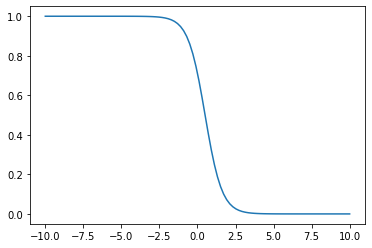

In [4]:
w = -1.8    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = 0.9    #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
# X will iterate and gives a nparray as output
plt.plot(X,Y)
plt.show() 

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1+e^{-(w_1x_1+ w_2x_2 + b)}}$

In [5]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [6]:
w1 = 0.5
w2 = 0.5
b = 0

X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

In [7]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red','yellow', 'green'])

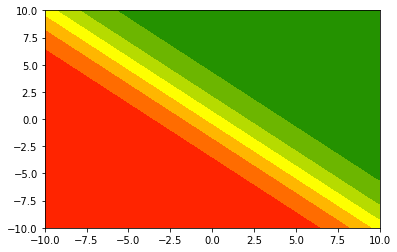

In [8]:
plt.contourf(XX1,XX2,Y, cmap = my_cmap)
plt.show()

In [9]:
Y.shape

(100, 100)

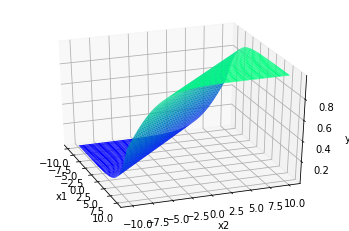

In [10]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(XX1, XX2, Y, cmap='winter')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 360-20)
plt.show()

#Compute Loss for a given Dataset

In [11]:
w_unkwn = 0.5
b_unkwn = 0.25

X = np.random.random(25) * 20 -10
Y = sigmoid(X, w_unkwn, b_unkwn)

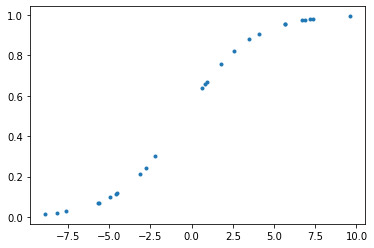

In [12]:
plt.plot(X, Y, '.')
plt.show()

In [13]:
def cal_loss(X, Y, w_est, b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y-sigmoid(x, w_est, b_est))**2
  return loss

In [14]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)

WW, BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

In [15]:
Loss.shape

(101, 101)

In [16]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = cal_loss(X,Y, WW[i, j], BB[i,j])

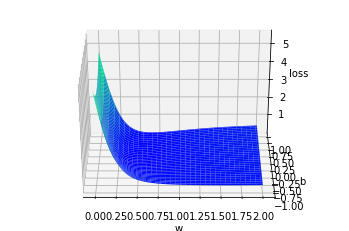

In [17]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(WW, BB, Loss, cmap='winter')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

ax.view_init(30, 360-90)
plt.show()

In [18]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [19]:
print(i,j)

63 25


In [20]:
print(WW[i,j], BB[i,j])

0.5 0.26


#Class for Sigmoid Neuron

In [41]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(self.w, x) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)

  def fit(self, X, Y, epochs=1, lr=1, initialise= True, display_loss = False):
    
     # intialise w,b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0

    if display_loss:
        loss = {}

    for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epoch'):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= lr*dw
      self.b -= lr*db

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
    if display_loss:
      b = []
      for i in list(loss.keys()):
        key = loss[i]
        b.append(key)
      plt.plot(b)
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
  


  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)
    

#Fit for toy data

In [42]:
X = np.asarray([[2.5,2.5], [4,-1], [1,-4], [-3,1.25], [-2,-4], [1,5]])
Y = [1, 1, 1, 0, 0, 0]

In [43]:
sn = SigmoidNeuron()

In [44]:
def sn_plot(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))

  ax.contourf(XX1 ,XX2, YY, cmap = my_cmap,)
  ax.scatter(X[:, 0],X[:, 1], c = Y, cmap = my_cmap)
  ax.plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[-0.46697906 -0.57168992]] [0.00064321]



[[ 0.38075847 -0.6404131 ]] [0.01778475]



[[ 0.83948082 -0.12808487]] [0.04501881]



[[ 0.86874574 -0.54734858]] [-0.05220256]



[[ 1.18709392 -0.07948892]] [-0.11306338]



[[ 1.12712837 -0.65386978]] [-0.19861469]



[[ 1.40538727 -0.21063272]] [-0.25934399]



[[ 1.34129777 -0.67311619]] [-0.34533084]



[[ 1.53995733 -0.35345306]] [-0.39618279]



[[ 1.51189049 -0.60459034]] [-0.45295182]



[[ 1.601717  -0.4860476]] [-0.4843291]



[[ 1.61778604 -0.54946486]] [-0.51575203]



[[ 1.65544598 -0.54228325]] [-0.54109578]



[[ 1.68342683 -0.55575854]] [-0.56538226]



[[ 1.71137937 -0.56390619]] [-0.58779192]



[[ 1.73750492 -0.57236537]] [-0.60877959]



[[ 1.76228136 -0.58029443]] [-0.62846636]



[[ 1.78581009 -0.58783182]] [-0.64699482]



[[ 1.80820992 -0.5950092 ]] [-0.66448278]



[[ 1.82958212 -0.60185899]] [-0.68103192]



[[ 1.85001513 -0.60840941]] [-0.69673034]



[[ 1.86958659 -0.61468522]] [-0.71165479]



[[ 1.88836498 -0.62070827]] [-0.72587249]



[[ 1.90641103 -0.62649792]] [-0.73944261]



[[ 1.92377881 -0.63207141]] [-0.75241745]



[[ 1.9405167  -0.63744415]] [-0.76484347]



[[ 1.9566681  -0.64262996]] [-0.77676209]



[[ 1.97227212 -0.64764132]] [-0.78821038]



[[ 1.98736413 -0.65248948]] [-0.79922162]



[[ 2.0019762  -0.65718467]] [-0.80982581]


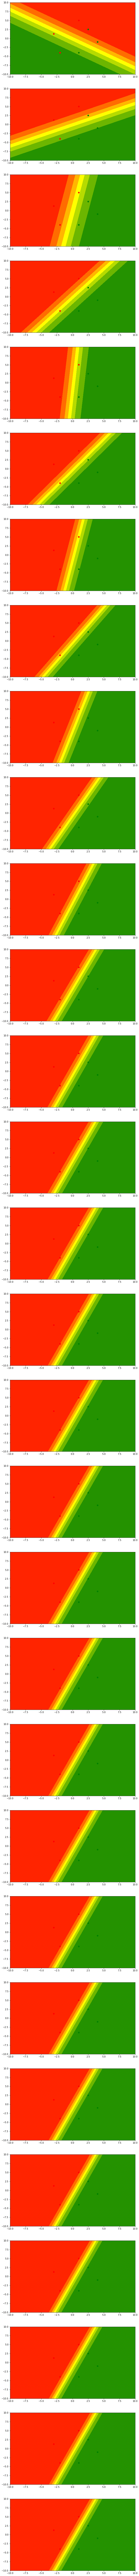

In [45]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*7))
for i in range(N):
  print(sn.w,sn.b)
  ax = plt.subplot(N,1,i+1)
  sn_plot(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.7, False)


#Load Data